In [8]:
!pip install torchvision
!pip install matplotlib
!pip install numpy

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

/home/kijuntu/anaconda3/envs/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


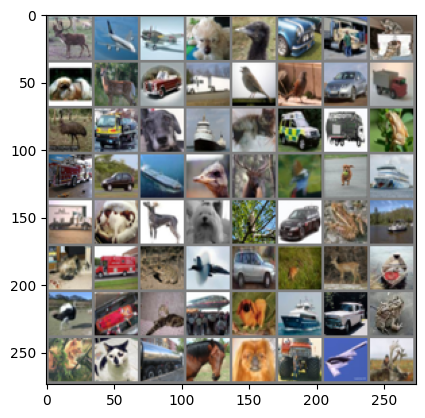

deer  plane plane dog   bird  car   truck cat   dog   deer  car   truck bird  bird  car   truck bird  truck dog   ship  cat   car   truck frog  truck car   ship  bird  deer  bird  dog   ship  truck dog   dog   dog   bird  car   frog  ship  cat   truck frog  plane car   deer  deer  ship  bird  truck cat   plane dog   ship  car   frog  cat   cat   truck horse dog   truck plane deer 


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

2025-01-27 19:03:34.131722: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-27 19:03:34.310148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738001014.384131  209705 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738001014.404216  209705 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-27 19:03:34.576548: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [7]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [8]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

/home/kijuntu/anaconda3/envs/venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-27 19:03:43.702309: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator, 
              epochs=10,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test)
             )

Epoch 1/10


/home/kijuntu/anaconda3/envs/venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - accuracy: 0.3314 - loss: 1.8826 - precision: 0.5153 - recall: 0.1175 - val_accuracy: 0.4266 - val_loss: 1.7560 - val_precision: 0.5978 - val_recall: 0.2650
Epoch 2/10
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 1:17 49ms/step - accuracy: 0.3750 - loss: 1.8959 - precision: 0.5625 - recall: 0.2812

2025-01-27 19:04:55.898806: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/kijuntu/anaconda3/envs/venv/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3750 - loss: 1.8959 - precision: 0.5625 - recall: 0.2812 - val_accuracy: 0.4068 - val_loss: 1.8356 - val_precision: 0.5791 - val_recall: 0.2562
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 66s 43ms/step - accuracy: 0.5370 - loss: 1.2966 - precision: 0.7096 - recall: 0.3564 - val_accuracy: 0.6376 - val_loss: 1.0454 - val_precision: 0.7543 - val_recall: 0.5384
Epoch 4/10
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 1:14 48ms/step - accuracy: 0.7188 - loss: 1.2460 - precision: 0.8500 - recall: 0.5312

2025-01-27 19:06:05.761571: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7188 - loss: 1.2460 - precision: 0.8500 - recall: 0.5312 - val_accuracy: 0.6369 - val_loss: 1.0460 - val_precision: 0.7499 - val_recall: 0.5395
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6164 - loss: 1.0976 - precision: 0.7596 - recall: 0.4730 - val_accuracy: 0.6229 - val_loss: 1.1666 - val_precision: 0.7053 - val_recall: 0.5434
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6562 - loss: 1.0529 - precision: 0.7500 - recall: 0.4688 - val_accuracy: 0.6249 - val_loss: 1.1667 - val_precision: 0.7045 - val_recall: 0.5455
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6728 - loss: 0.9479 - precision: 0.7956 - recall: 0.5572 - val_accuracy: 0.7139 - val_loss: 0.8481 - val_precision: 0.8102 - val_recall: 0.6282
Epoch 8/10
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 1:10 45ms/step - accuracy: 0.6562 - loss: 1.0338 - precision: 0.8500 - recall: 0.5312

2025-01-27 19:08:24.525018: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6562 - loss: 1.0338 - precision: 0.8500 - recall: 0.5312 - val_accuracy: 0.7117 - val_loss: 0.8612 - val_precision: 0.8078 - val_recall: 0.6243
Epoch 9/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7005 - loss: 0.8753 - precision: 0.8041 - recall: 0.5960 - val_accuracy: 0.7333 - val_loss: 0.7799 - val_precision: 0.8147 - val_recall: 0.6664
Epoch 10/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5938 - loss: 1.0689 - precision: 0.7308 - recall: 0.5938 - val_accuracy: 0.7301 - val_loss: 0.8011 - val_precision: 0.8080 - val_recall: 0.6604


In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [11]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Finished Training


In [12]:
PATH1 = './cifar_net.pth'
torch.save(net.state_dict(), PATH1)

AttributeError: 'Sequential' object has no attribute 'state_dict'

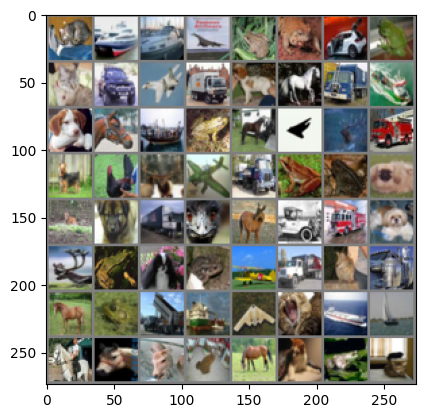

GroundTruth:  cat   ship  ship  plane


In [13]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH1, weights_only=True))

In [14]:
outputs = net(images)
outputs2 = torch.from_numpy(model(X_test).numpy())

In [15]:
type(outputs)

torch.Tensor

In [16]:
type(outputs2)

torch.Tensor

In [17]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   car   ship 


In [18]:
_, predicted = torch.max(outputs2, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  ship 


In [19]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


In [27]:
y_test = np.squeeze(y_test)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [28]:
y_test.shape

(10000,)

In [30]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    # calculate outputs by running images through the network
    outputs = torch.from_numpy(model(X_test).numpy())
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.numpy()
    total += y_test.shape[0]
    correct += (predicted == y_test).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

[3 8 8 ... 5 1 7]
Accuracy of the network on the 10000 test images: 73 %


In [31]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 53.8 %
Accuracy for class: car   is 80.3 %
Accuracy for class: bird  is 41.4 %
Accuracy for class: cat   is 28.0 %
Accuracy for class: deer  is 36.9 %
Accuracy for class: dog   is 54.2 %
Accuracy for class: frog  is 71.1 %
Accuracy for class: horse is 59.7 %
Accuracy for class: ship  is 64.8 %
Accuracy for class: truck is 44.1 %


In [32]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
     # calculate outputs by running images through the network
    outputs = torch.from_numpy(model(X_test).numpy())
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.numpy()
    
    for label, prediction in zip(y_test, predicted):
        if label == prediction:
            correct_pred[classes[label]] += 1
        total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 75.9 %
Accuracy for class: car   is 90.7 %
Accuracy for class: bird  is 68.5 %
Accuracy for class: cat   is 53.9 %
Accuracy for class: deer  is 47.8 %
Accuracy for class: dog   is 60.1 %
Accuracy for class: frog  is 92.0 %
Accuracy for class: horse is 69.6 %
Accuracy for class: ship  is 80.9 %
Accuracy for class: truck is 90.7 %
